In [1]:
#import libraries to import data and find out insights from data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Load data set
bank_df = pd.read_csv("bank-full.csv")

In [3]:
#See structure of data set
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


From the above structure we can understand the structure of data set and in one atribute we see there are -1 values so we need to work on it.

In [6]:
bank_df.shape

(45211, 17)

In [9]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are many attributes which are having type as object so we need to change it to categorical one which we can use for computing data set to create models.

In [4]:
#to check statistical distrtibution of data set
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


From the above computation we can see total count of entries mean, standard deviation, and 5 point distribution of all numerical data set. Here also we can see that in attribute pdays the minimum number is -1 and and it is distributed throughout data set so it can be regarded as missing value.

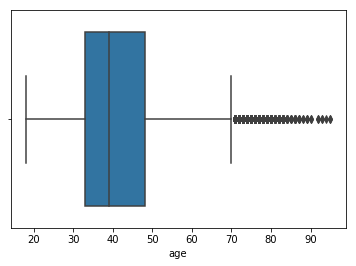

In [10]:
#Visualising data set
sns.boxplot(bank_df['age'])

So we can see that there are many outliers present in age attributes as people above 70 years of age will rarely opt for term deposits.

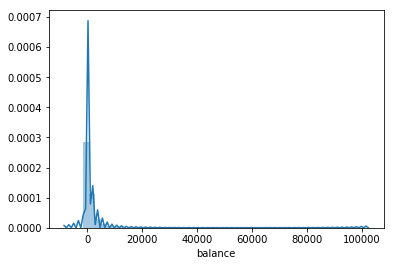

In [12]:
sns.distplot(bank_df['balance'])

balance attribute is very much right skewed in nature

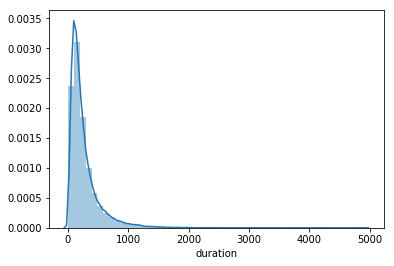

In [15]:
sns.distplot((bank_df['duration']))

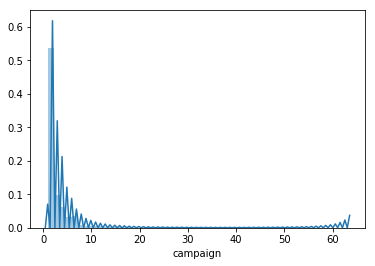

In [16]:
sns.distplot(bank_df['campaign'])

In [18]:
bank_df['education'].value_counts(normalize=True)

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

In [20]:
bank_df['job'].value_counts(normalize=True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

In [22]:
bank_df['marital'].value_counts(normalize=True)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

In [24]:
bank_df['default'].value_counts(normalize=True)

no     0.981973
yes    0.018027
Name: default, dtype: float64

In [26]:
bank_df['contact'].value_counts(normalize=True)

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

In [29]:
bank_df['Target'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

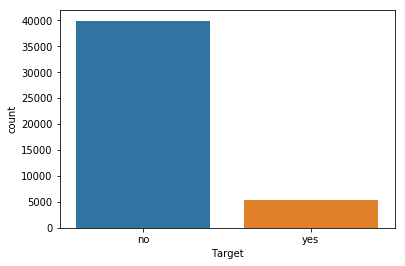

In [30]:
sns.countplot(bank_df['Target'])

In [32]:
bank_df.groupby(['Target']).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [43]:
#convert all the object data types to cATEGORICAL data type.
for feature in bank_df.columns: # Loop through all columns in the dataframe
    if bank_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        bank_df[feature] = pd.Categorical(bank_df[feature]).codes #

In [44]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int8
marital      45211 non-null int8
education    45211 non-null int8
default      45211 non-null int8
balance      45211 non-null int64
housing      45211 non-null int8
loan         45211 non-null int8
contact      45211 non-null int8
day          45211 non-null int64
month        45211 non-null int8
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int8
Target       45211 non-null int8
dtypes: int64(7), int8(10)
memory usage: 2.8 MB


In [42]:
#As there is -1 value in pdays so it missing value so we need to handel it.
bank_df['pdays'] = bank_df.replace('-1', np.nan)
bank_df.median()
bank_df = bank_df.apply(lambda x : x.fillna(x.median(), axis=0))
bank_df['pdays'].head()

0    58
1    44
2    33
3    47
4    33
Name: pdays, dtype: int64

In [45]:
#Preparing data set 
from sklearn.model_selection import train_test_split

X = bank_df.drop(['Target'], axis=1)
y = bank_df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [47]:
#Create a model using Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [49]:
print(dt_model.score(X_train, y_train))

1.0


In [50]:
print(dt_model.score(X_test, y_test))

0.8781332940135653


So we can see that by using desicion tree without doing any hyper tuning we get 100% accuracy in train data set and 87.8% in test data set, so we can see confusion matrix and then we can use same DT by some hypertunning and see the accuracy


In [52]:
from sklearn import metrics
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[11147   818]
 [  835   764]]


In [57]:
metrics.classification_report(y_test, y_predict)

'              precision    recall  f1-score   support\n\n           0       0.93      0.93      0.93     11965\n           1       0.48      0.48      0.48      1599\n\n   micro avg       0.88      0.88      0.88     13564\n   macro avg       0.71      0.70      0.71     13564\nweighted avg       0.88      0.88      0.88     13564\n'

In [58]:
#to print how imp was all attributes
print(pd.DataFrame(dt_model.feature_importances_, columns=['IMP'], index = X_train.columns))

                IMP
age        0.052462
job        0.038597
marital    0.018356
education  0.023782
default    0.000394
balance    0.113536
housing    0.031815
loan       0.009338
contact    0.055678
day        0.092239
month      0.104537
duration   0.305229
campaign   0.029125
pdays      0.054023
previous   0.014272
poutcome   0.056618


In [ ]:
#computing same technique by regularizing parameters
dt_model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
dt_model1.fit(X_train, y_train)

print(dt_model1.score(X_train, y_train))
print(dt_model1.score(X_test, y_test))

In [64]:
y_predict1 = dt_model1.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict1))
print(metrics.classification_report(y_test, y_predict1))

[[11677   288]
 [ 1226   373]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11965
           1       0.56      0.23      0.33      1599

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.73      0.60      0.63     13564
weighted avg       0.86      0.89      0.87     13564



By using regularization parameter we can see that now tyhe model is not over fitting 

In [59]:
#to print how imp was all attributes
print(pd.DataFrame(dt_model1.feature_importances_, columns=['IMP'], index = X_train.columns))

                IMP
age        0.012624
job        0.000000
marital    0.001479
education  0.001532
default    0.000000
balance    0.001138
housing    0.076955
loan       0.000000
contact    0.158808
day        0.001814
month      0.064240
duration   0.608192
campaign   0.001737
pdays      0.000000
previous   0.000000
poutcome   0.071481


By going through the importance of all features we can see that there are few attribuites whose importance is almost zero or close to zero so those attributes even if we will removew it then also it will not effect the accuracy of models.

In [63]:
#Creating models using ENSEMBLE METHODS
#Bagging Method

from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators = 50, max_samples = 0.8)
bgcl = bgcl.fit(X_train, y_train)
print(bgcl.score(X_test, y_test))
print(bgcl.score(X_train,y_train))

0.9031996461220879
0.9973457199734572


In [65]:
y_predict2 = bgcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict2))
print(metrics.classification_report(y_test, y_predict2))

[[11536   429]
 [  884   715]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11965
           1       0.62      0.45      0.52      1599

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.71      0.73     13564
weighted avg       0.89      0.90      0.90     13564



Thus by using bagging method we can see that it has incresed accuracy for by test data set.

In [69]:
#Ada-Boosting method

from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(base_estimator = dt_model, n_estimators=50)
abcl.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [70]:
print(abcl.score(X_train, y_train))
print(abcl.score(X_test, y_test))

1.0
0.8762901798879387


In [71]:
y_predict3 = bgcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict3))
print(metrics.classification_report(y_test, y_predict3))

[[11536   429]
 [  884   715]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11965
           1       0.62      0.45      0.52      1599

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.71      0.73     13564
weighted avg       0.89      0.90      0.90     13564



In [72]:
#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate=0.09, max_depth=5)
gbcl = gbcl.fit(X_train, y_train)

In [73]:
print(gbcl.score(X_train, y_train))
print(gbcl.score(X_test, y_test))

0.9162953834486681
0.9062223532881156


In [74]:
y_predict4 = bgcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict4))
print(metrics.classification_report(y_test, y_predict4))

[[11536   429]
 [  884   715]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11965
           1       0.62      0.45      0.52      1599

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.71      0.73     13564
weighted avg       0.89      0.90      0.90     13564



In [75]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [76]:
print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))

0.9998420071412772
0.9048215865526393


In [77]:
y_predict5 = bgcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict5))
print(metrics.classification_report(y_test, y_predict5))

[[11536   429]
 [  884   715]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11965
           1       0.62      0.45      0.52      1599

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.71      0.73     13564
weighted avg       0.89      0.90      0.90     13564



In the above codes i have used decision tree with and without regularizing the parameters and thus we can say that accuracy increases by regularizing parameters. And it avoids overfiting and underfiting of models.
The prediction is majorly based on duration attriburtes that means if a customer is likely to give his more time to our marketing representative then that person is likely to take banks term deposits.


Secondaly i have used few of the ensemble methods like bagging, ada boosting, gradient boost, random forest method and we can see that by using these ensemble techniques we are able to increase the accuracy of model by avoiding both over fitting and under fitting of models. 